In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [70]:
ds=pd.read_csv('headbrain.csv')

In [71]:
ds

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [72]:
ds.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [73]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [74]:
ds.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

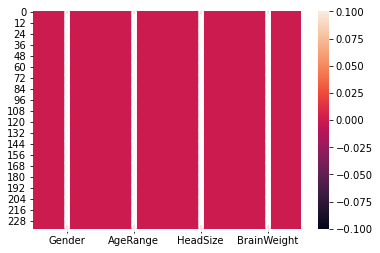

In [75]:
sns.heatmap(ds.isnull(),annot=True)

In [76]:
ds.shape

(237, 4)

In [77]:
ds.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


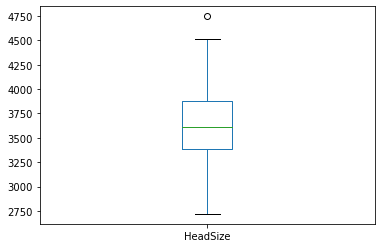

In [78]:
ds['HeadSize'].plot.box()

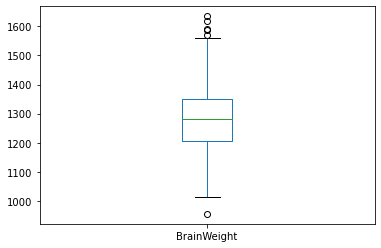

In [79]:
ds['BrainWeight'].plot.box()

In [80]:
ds['Gender'].value_counts()

1    134
2    103
Name: Gender, dtype: int64

In [81]:
ds['AgeRange'].value_counts()

2    127
1    110
Name: AgeRange, dtype: int64

In [82]:
#Removing Outliers
from scipy.stats import zscore

In [83]:
z=np.abs(zscore(ds))

In [84]:
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [85]:
threshold=3
np.where(z>3)

(array([24], dtype=int64), array([2], dtype=int64))

In [86]:
z[24][2]

3.0536047510297246

In [87]:
ds.shape

(237, 4)

In [88]:
Q1=ds.quantile(0.25)

In [89]:
Q3=ds.quantile(0.75)

In [90]:
Q1

Gender            1.0
AgeRange          1.0
HeadSize       3389.0
BrainWeight    1207.0
Name: 0.25, dtype: float64

In [91]:
Q3

Gender            2.0
AgeRange          2.0
HeadSize       3876.0
BrainWeight    1350.0
Name: 0.75, dtype: float64

In [92]:
IQR=Q3-Q1

In [93]:
IQR

Gender           1.0
AgeRange         1.0
HeadSize       487.0
BrainWeight    143.0
dtype: float64

In [94]:
(ds<(Q1-(1.5 * IQR )))| (ds>(Q3 + (1.5 * IQR)))

,Gender,AgeRange,HeadSize,BrainWeight
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,True
...,...,...,...,...
232,False,False,False,False
233,False,False,False,False
234,False,False,False,False
235,False,False,False,False


In [95]:
ds_new=ds[(z<3).all(axis=1)]

In [96]:
ds_new

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [97]:
ds.shape

(237, 4)

In [98]:
ds_new.shape

(236, 4)

In [99]:
ds=ds_new

In [100]:
ds

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


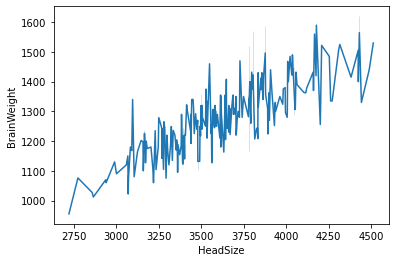

In [101]:
sns.lineplot(x=ds['HeadSize'],y=ds['BrainWeight'],data=ds)
plt.show()

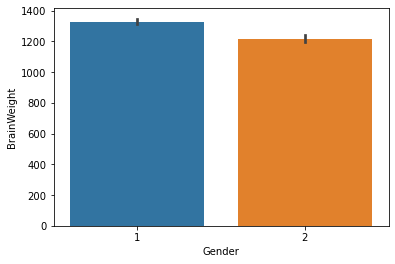

In [102]:
sns.barplot(x=ds["Gender"],y=ds['BrainWeight'],data=ds)

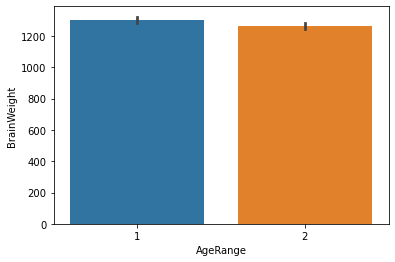

In [103]:
sns.barplot(x=ds['AgeRange'],y=ds['BrainWeight'],data=ds)

(array([ 2.,  9., 21., 39., 52., 55., 30., 15.,  8.,  5.]),
 array([ 955. , 1021.5, 1088. , 1154.5, 1221. , 1287.5, 1354. , 1420.5,
        1487. , 1553.5, 1620. ]),
 <a list of 10 Patch objects>)

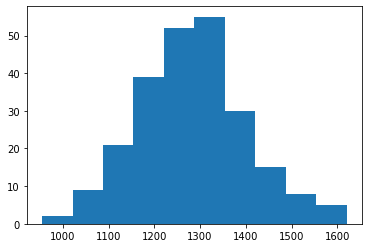

In [104]:
plt.hist(x='BrainWeight',bins=10,data=ds)

In [105]:
#Check the skewness of the dataset

ds.skew()

Gender         0.257959
AgeRange      -0.153968
HeadSize       0.164767
BrainWeight    0.205274
dtype: float64

In [106]:
x=ds[['HeadSize']]


In [107]:
type(x)

pandas.core.frame.DataFrame

In [108]:
x.head()

,HeadSize
0,4512
1,3738
2,4261
3,3777
4,4177


In [109]:
x.shape

(236, 1)

In [110]:
y=ds['BrainWeight']

In [111]:
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [112]:
type(y)

pandas.core.series.Series

In [113]:
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [114]:
y.shape

(236,)

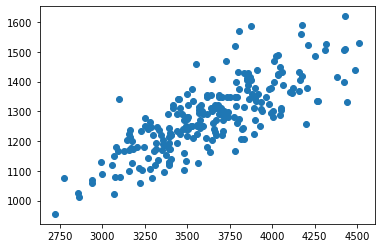

In [115]:
plt.scatter(x,y)

In [116]:
#Input data to be on the same scale , we use Standard Scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.46589809],
       [ 0.30372296],
       [ 1.7647276 ],
       [ 0.41266977],
       [ 1.53007294],
       [-0.12368375],
       [ 0.43501784],
       [-0.19631495],
       [-0.04546553],
       [ 0.9853389 ],
       [-0.52036187],
       [ 1.01606748],
       [ 0.02995919],
       [ 1.61667168],
       [ 0.56631271],
       [ 0.68922706],
       [-0.36951244],
       [-0.45611119],
       [-1.49250262],
       [ 2.22006939],
       [ 0.69481407],
       [ 1.1641234 ],
       [ 0.48809449],
       [ 0.22550474],
       [ 2.21727589],
       [ 1.13618832],
       [ 1.09707921],
       [-0.48963328],
       [ 1.52448592],
       [ 0.44060485],
       [ 0.46574642],
       [ 1.32335335],
       [ 1.48537681],
       [ 1.47699629],
       [ 0.51602957],
       [-0.28570721],
       [ 0.33165804],
       [-0.82485423],
       [-0.38347998],
       [ 0.92946874],
       [-0.34716438],
       [ 1.91557703],
       [ 0.48809449],
       [ 0.65291145],
       [ 1.13060131],
       [ 1

In [117]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [118]:
x.shape

(236, 1)

In [119]:
y.shape

(236,)

In [121]:
x_train.shape

(184, 1)

In [122]:
y_train.shape

(184,)

In [123]:
x_test.shape

(52, 1)

In [124]:
y_test.shape

(52,)

In [125]:
lm=LinearRegression()

In [126]:
lm.fit(x_train,y_train)

LinearRegression()

In [127]:
y_pred=lm.predict(x_test)

In [128]:
y_pred

array([1379.26122466, 1205.86201223, 1378.46581543, 1372.36767799,
       1391.19236313, 1296.27352819, 1293.62216409, 1297.59921025,
       1197.64278351, 1344.26321848, 1431.2279611 , 1347.97512823,
       1294.15243691, 1323.05230565, 1239.00406354, 1135.86599988,
       1489.5579714 , 1269.49475074, 1306.87898461, 1489.29283499,
       1187.3024635 , 1229.45915276, 1237.41324508, 1299.45516512,
       1295.47811896, 1386.68504415, 1219.64910558, 1282.22129844,
       1337.36967181, 1137.19168193, 1231.58024405, 1210.63446762,
       1458.80214779, 1252.52602047, 1215.67205942, 1263.3966133 ,
       1177.75755273, 1243.77651893, 1095.8304019 , 1253.3214297 ,
       1189.42355479, 1257.29847586, 1319.3403959 , 1216.20233224,
       1172.45482452, 1168.74291477, 1264.98743176, 1407.36568417,
       1182.79514453, 1177.22727991, 1130.82840808, 1173.78050657])

In [141]:
r2_scr=r2_score(y_test,y_pred)

In [130]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    print("r2_score corresponding to random state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()
print()
print("max r2 score corresponding  to ", final_r_state,"is", max_r_score)


r2_score corresponding to random state: 42 is: 0.5669160840013312
r2_score corresponding to random state: 43 is: 0.5669160840013312
r2_score corresponding to random state: 44 is: 0.5669160840013312
r2_score corresponding to random state: 45 is: 0.5669160840013312
r2_score corresponding to random state: 46 is: 0.5669160840013312
r2_score corresponding to random state: 47 is: 0.5669160840013312
r2_score corresponding to random state: 48 is: 0.5669160840013312
r2_score corresponding to random state: 49 is: 0.5669160840013312
r2_score corresponding to random state: 50 is: 0.5669160840013312
r2_score corresponding to random state: 51 is: 0.5669160840013312
r2_score corresponding to random state: 52 is: 0.5669160840013312
r2_score corresponding to random state: 53 is: 0.5669160840013312
r2_score corresponding to random state: 54 is: 0.5669160840013312
r2_score corresponding to random state: 55 is: 0.5669160840013312
r2_score corresponding to random state: 56 is: 0.5669160840013312
r2_score c

In [131]:
#Lets do the cross validation
#cv=5 , means cross folds=5
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.4734555277018046

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [133]:
y_pred

array([1379.26122466, 1205.86201223, 1378.46581543, 1372.36767799,
       1391.19236313, 1296.27352819, 1293.62216409, 1297.59921025,
       1197.64278351, 1344.26321848, 1431.2279611 , 1347.97512823,
       1294.15243691, 1323.05230565, 1239.00406354, 1135.86599988,
       1489.5579714 , 1269.49475074, 1306.87898461, 1489.29283499,
       1187.3024635 , 1229.45915276, 1237.41324508, 1299.45516512,
       1295.47811896, 1386.68504415, 1219.64910558, 1282.22129844,
       1337.36967181, 1137.19168193, 1231.58024405, 1210.63446762,
       1458.80214779, 1252.52602047, 1215.67205942, 1263.3966133 ,
       1177.75755273, 1243.77651893, 1095.8304019 , 1253.3214297 ,
       1189.42355479, 1257.29847586, 1319.3403959 , 1216.20233224,
       1172.45482452, 1168.74291477, 1264.98743176, 1407.36568417,
       1182.79514453, 1177.22727991, 1130.82840808, 1173.78050657])

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("r2score is:",r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2score is: 0.5669160840013312
RMSE is: 75.20603893371218


In [140]:
lm.intercept_

1278.8475499634155

In [142]:
lm.predict([[417]])

array([40857.00037001])

In [136]:
#Lets save the model using joblib

import joblib
joblib.dump(lm,'lm_headbrain.pkl')

['lm_headbrain.pkl']